In [42]:
import pandas as pd
import numpy as np
from task1_utils import generateDataVectors,forward_pass,loss,getConfused,getErrorRate
import matplotlib.pyplot as plt

In [43]:
features = ["SepalLength",
            "SepalWidth",
            "PetalLength",
            "PetalWidth",
            "Class"]

irisData = pd.read_csv("data/IrisData/iris.data", 
                   names=features)

# Take 30 first samples of each Class for training
train_data = irisData.groupby("Class").head(30)
test_data = irisData.drop(train_data.index)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

In [44]:
train_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
# Generate data vectors
x_train, t_train = generateDataVectors(train_data)
x_test, t_test = generateDataVectors(test_data)
x_total = np.hstack((x_train, x_test))
t_total = np.hstack((t_train, t_test))


print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)
print(x_total.shape, t_total.shape)

(5, 90) (3, 90) (5, 60) (3, 60)
(5, 150) (3, 150)


In [46]:
# initialize the weights
np.random.seed(42)

n_features = x_train.shape[0]
n_classes = t_train.shape[0]

W = np.random.randn(n_classes,n_features)
W

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783]])

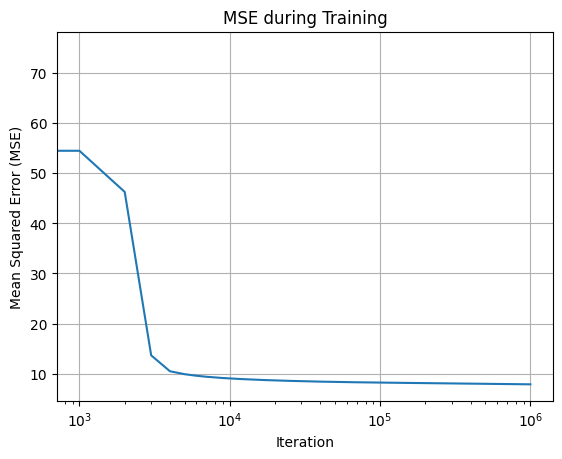

In [ ]:
MSE_list = []
alpha = 0.001

for i in range(10**6):
    # Forward pass
    g = forward_pass(x_train, W)

    # Loss
    MSE = loss(g,t_train)

    # Backward pass
    grad_MSE = ((g-t_train)*g*(1-g))@x_train.transpose()

    W = W - alpha*grad_MSE

    if i % 1000 == 0:  # Store every 1000 iterations to keep the plot readable
        MSE_list.append(MSE)

# Plot
plt.plot(range(0, 10**6, 1000), MSE_list)
plt.xscale('log')
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE during Training")
plt.grid()
plt.show()



In [48]:
predictions_train = forward_pass(x_train,W)
predictions_test = forward_pass(x_test,W)

train_conf_matrix = getConfused(predictions_train, t_train)
test_conf_matrix = getConfused(predictions_test, t_test)



print(train_conf_matrix)
print(f"{getErrorRate(train_conf_matrix):.4f}")
print(test_conf_matrix)
print(f"{getErrorRate(test_conf_matrix):.4f}")

[[30.  0.  0.]
 [ 0. 29.  1.]
 [ 0.  0. 30.]]
0.0112
[[20.  0.  0.]
 [ 0. 19.  1.]
 [ 0.  1. 19.]]
0.0345


## First 30 are train last 20 are test:

MSE = 7.898

### Validation with training data:
[30.  0.  0.]\
[ 0. 29.  1.]\
[ 0.  0. 30.]

error rate = 0.0112

### Validation with test data:
[20.  0.  0.]\
[ 0. 19.  1.]\
[ 0.  1. 19.]

error rate = 0.0345

## First 20 are test last 30 are train:

MSE = 7.545

### Validation with training data:

 [30.  0.  0.]\
 [ 0. 27.  3.]\
 [ 0.  2. 28.]

0.0588


### Validation with test data:

[[20.  0.  0.]\
 [ 0. 20.  0.]\
 [ 0.  1. 19.]]

0.0169
